In [2]:
import pandas as pd
neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")
neo_data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
"""
Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).
"""
#first normalizing the values of the dataset
final_neo_data = neo_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

#ensuring that the values are numeric:
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    final_neo_data.loc[:,column] = pd.to_numeric(final_neo_data[column], errors='coerce')

#normalizing the values using min max normalization
final_neo_data = (final_neo_data - final_neo_data.min())/(final_neo_data.max() - final_neo_data.min())
#adding the hazardous column as that's our target
final_neo_data['hazardous'] = neo_data['hazardous']
final_neo_data


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.031607,0.031607,0.056447,0.733141,0.312891,False
1,0.006999,0.006999,0.309922,0.821364,0.449312,True
2,0.019039,0.019039,0.481680,0.665740,0.358782,False
3,0.002531,0.002531,0.103726,0.339986,0.541093,False
4,0.006714,0.006714,0.179632,0.618634,0.453066,True
...,...,...,...,...,...,...
90831,0.000685,0.000685,0.219081,0.164371,0.657906,False
90832,0.000427,0.000427,0.193893,0.726208,0.699625,False
90833,0.000827,0.000827,0.031097,0.379640,0.641218,False
90834,0.000177,0.000177,0.291384,0.918352,0.774718,False


In [15]:
#dividing the model into the test and train datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = final_neo_data.drop(columns='hazardous')
y = final_neo_data['hazardous']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#fitting the data
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
#now predicting the data
y_pred_test = neigh.predict(X_test)
y_pred_train = neigh.predict(X_train)

#drawing confusion matrix for the tested data
print(f"Confusion matrix for the testing dataset:\n {confusion_matrix(y_pred_test,y_test)}")
print(f"Confusion matrix for the training dataset:\n {confusion_matrix(y_pred_train, y_train)}")

#printing the classification report
print(f"Classification report for training data:\n{classification_report(y_train, y_pred_train)}")
print(f"Classification for testing dataset:\n{classification_report(y_test,y_pred_test)}")

# Accuracy to check for overfitting/underfitting
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Summary of performance and model fit
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

# Determine model fit based on accuracies
if accuracy_train > 0.95 and (accuracy_train - accuracy_test) > 0.05:
    print("Model might be overfitting.")
elif accuracy_train < 0.7 and accuracy_test < 0.7:
    print("Model might be underfitting.")
else:
    print("Model is likely well-fitted (regular fit).")

Confusion matrix for the testing dataset:
 [[23522  1765]
 [ 1088   876]]
Confusion matrix for the training dataset:
 [[56246  2497]
 [ 1140  3702]]
Classification report for training data:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     57386
        True       0.76      0.60      0.67      6199

    accuracy                           0.94     63585
   macro avg       0.86      0.79      0.82     63585
weighted avg       0.94      0.94      0.94     63585

Classification for testing dataset:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94     24610
        True       0.45      0.33      0.38      2641

    accuracy                           0.90     27251
   macro avg       0.69      0.64      0.66     27251
weighted avg       0.88      0.90      0.89     27251

Training Accuracy: 0.9428009750727373
Test Accuracy: 0.8953065942534219
Model is likely well-fitted (regular fit).


In [28]:
"""
Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. 
Analyse the results
"""
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the purchase dataset into the notebook
purchase = pd.read_excel("C:\\Users\\everybody\\Downloads\\Lab Session Data.xlsx")

# Dropping columns with NaN values
purchase = purchase.dropna(axis=1)

# Select relevant columns
final_purchase_data = purchase[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]

# Ensure that the values are numeric
for column in ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']:
    final_purchase_data[column] = pd.to_numeric(final_purchase_data[column], errors='coerce')

# Drop any remaining rows with NaN values
final_purchase_data = final_purchase_data.dropna()

# Step 1: Normalize only the features (not the target variable)
X = final_purchase_data.drop(columns='Payment (Rs)')
y = final_purchase_data['Payment (Rs)']

# Min-Max Scaling the features
X = (X - X.min()) / (X.max() - X.min())

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the KNN Regressor model
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Output the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")


C:\Users\everybody\AppData\Local\Temp\ipykernel_6628\1667478283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_purchase_data[column] = pd.to_numeric(final_purchase_data[column], errors='coerce')


MSE: 1555.1481481481485
RMSE: 39.43536671755632
MAPE: 0.20916180668993387
R²: 0.601539220710205
Predicted payments for the test set: [194.         247.66666667 196.        ]


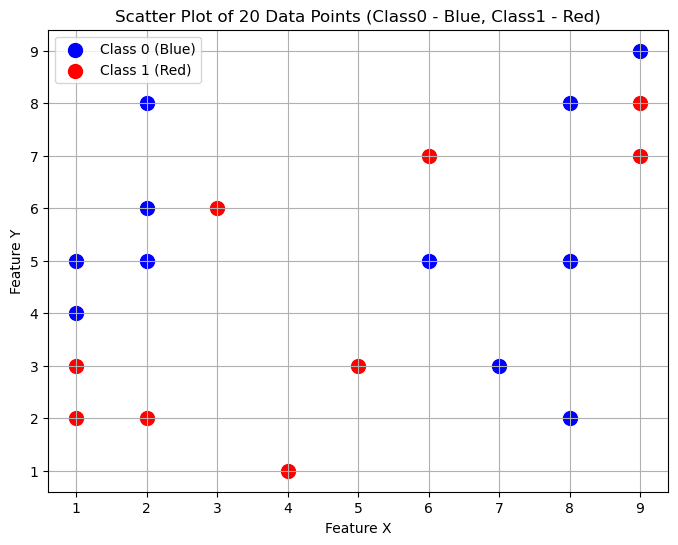

In [30]:
"""
 Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.
"""
import numpy as np
import matplotlib.pyplot as plt
#creating 20 random datapoints for X and Y
X = np.random.randint(1,10,20)
Y = np.random.randint(1,10,20)

# Step 2: Assign classes randomly (class0: Blue, class1: Red)
classes = np.random.choice([0, 1], size=20) 
plt.figure(figsize=(8, 6))

# Plot class0 points in Blue
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)', s=100)

# Plot class1 points in Red
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)', s=100)

# Add labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of 20 Data Points (Class0 - Blue, Class1 - Red)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
#observation; I see 2 different classes but they are not linearly separable

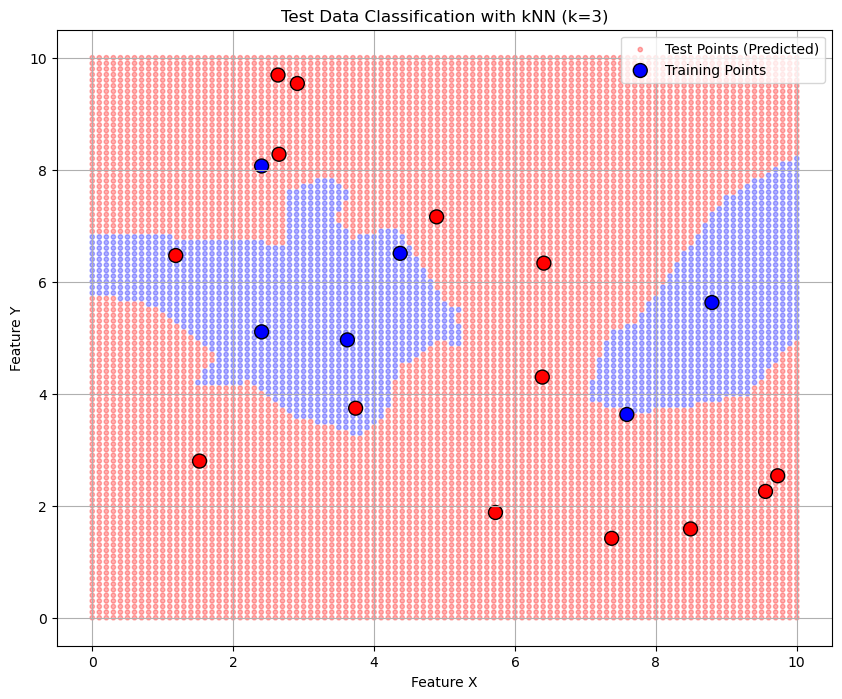

In [31]:
"""
Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate 20 random training data points for X and Y between 1 and 10
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Step 2: Assign classes randomly (class0: Blue, class1: Red) for training data
classes_train = np.random.choice([0, 1], size=20)

# Combine X and Y into a single training set
train_data = np.column_stack((X_train, Y_train))

# Step 3: Generate test data with X and Y values ranging from 0 to 10 with increments of 0.1
x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)

# Flatten the mesh grid to create a list of points (test data)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Test set with ~10,000 points

# Step 4: Train kNN Classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes_train)

# Step 5: Classify the test points using the kNN model
test_predictions = knn.predict(test_data)

# Step 6: Plot the test data output
plt.figure(figsize=(10, 8))

# Plot the test data points colored by predicted class
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.3, s=10, label='Test Points')

# Plot the training data points
plt.scatter(train_data[:, 0], train_data[:, 1], c=classes_train, cmap='bwr', edgecolor='black', s=100, label='Training Points')

# Labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Test Data Classification with kNN (k=3)')
plt.legend(['Test Points (Predicted)', 'Training Points'])
plt.grid(True)

# Show plot
plt.show()


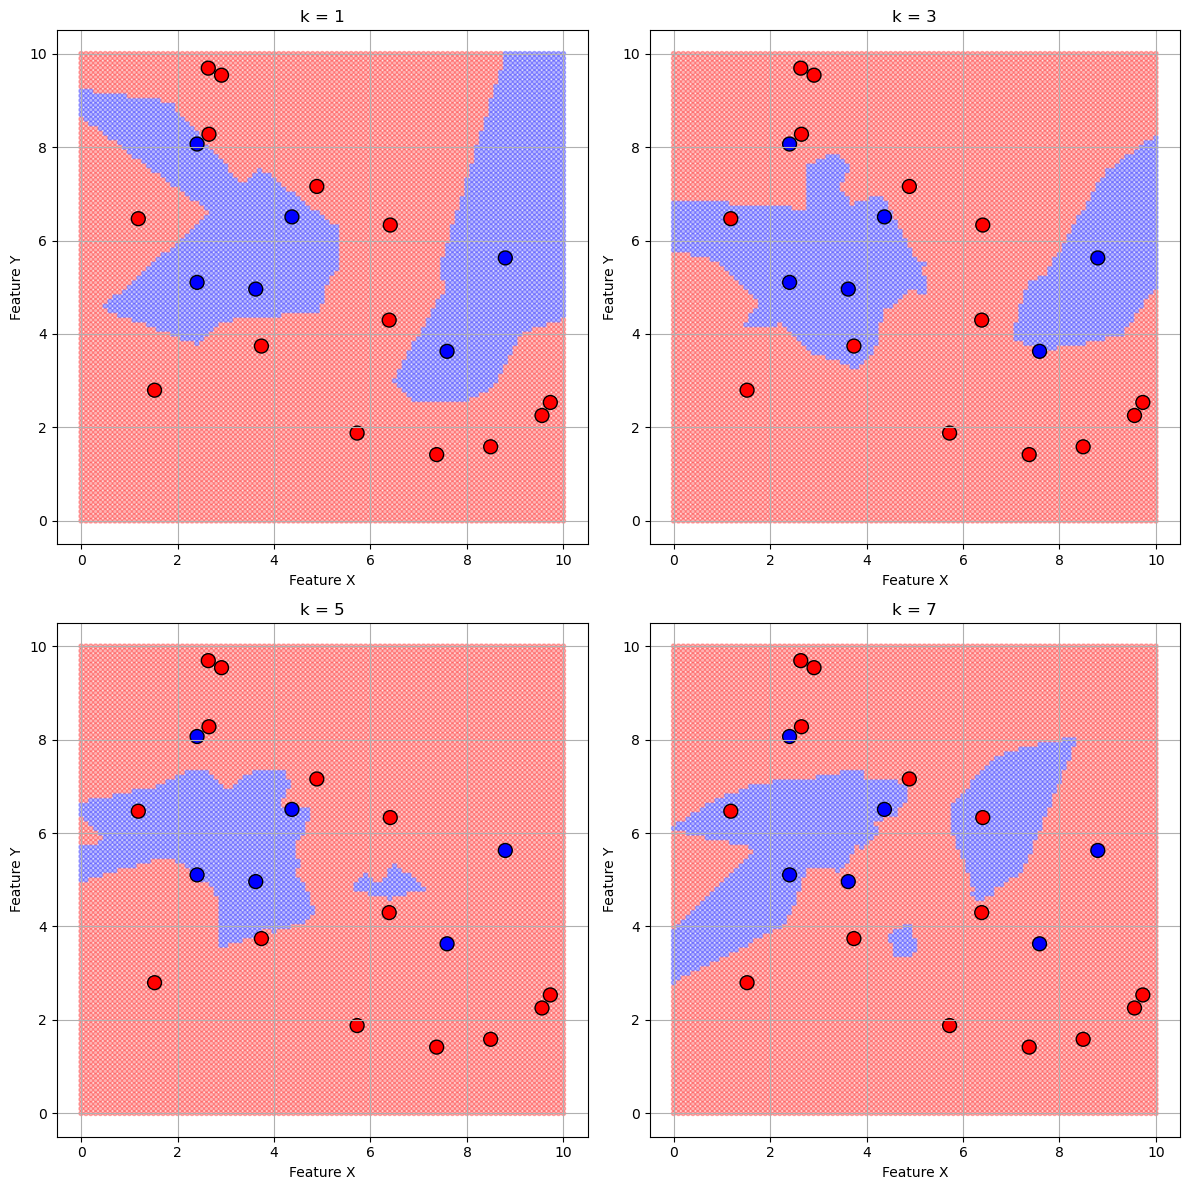

In [32]:
"""
Repeat A4 exercise for various values of k and observe the change in the class boundary lines
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate 20 random training data points for X and Y between 1 and 10
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Step 2: Assign classes randomly (class0: Blue, class1: Red) for training data
classes_train = np.random.choice([0, 1], size=20)

# Combine X and Y into a single training set
train_data = np.column_stack((X_train, Y_train))

# Step 3: Generate test data with X and Y values ranging from 0 to 10 with increments of 0.1
x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)

# Flatten the mesh grid to create a list of points (test data)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Test set with ~10,000 points

# Step 4: Experiment with different k values
k_values = [1, 3, 5, 7]  # List of k values to experiment with

plt.figure(figsize=(12, 12))

# Loop over each k value
for i, k in enumerate(k_values):
    # Train the kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes_train)

    # Classify the test points using the kNN model
    test_predictions = knn.predict(test_data)

    # Plot the results for the current k value
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for subplots
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.3, s=10, label='Test Points')
    plt.scatter(train_data[:, 0], train_data[:, 1], c=classes_train, cmap='bwr', edgecolor='black', s=100, label='Training Points')
    
    # Plot title and labels
    plt.title(f'k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the final_neo_data dataset
final_neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")  # Replace with the correct path to your CSV file

# Step 2: Prepare the data (features and target)
# Using relevant columns as features
X = final_neo_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

# Using hazardous (True/False) as the target
y = final_neo_data['hazardous']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Set up GridSearchCV for finding the best k
param_grid = {'n_neighbors': np.arange(1, 20)}  # Testing k values from 1 to 19

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Step 5: Find the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"The best k value found by GridSearchCV: {best_k}")

# Step 6: Evaluate the model on the test set with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with best k = {best_k}: {accuracy}")



The best k value found by GridSearchCV: 18
Test set accuracy with best k = 18: 0.9025723826648563


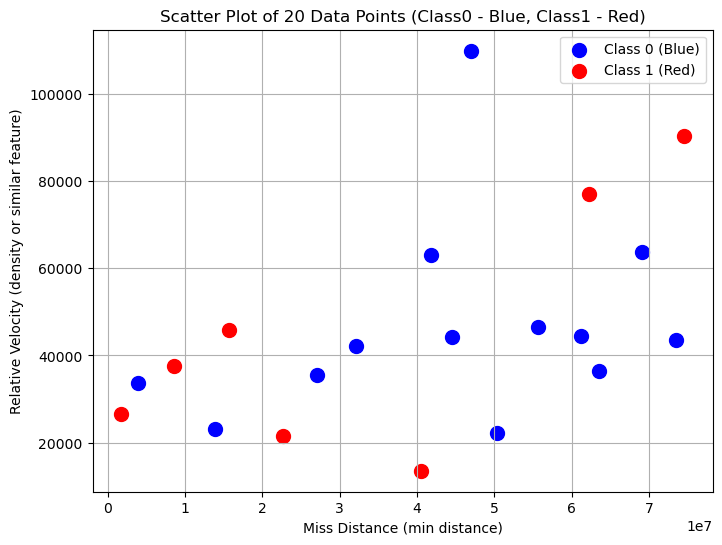

In [37]:
"""
Q6: . Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot 
Features from your dataset
"""
#two features I've chosen: Miss distance and Normalization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace with the actual path or the dataset variable)
final_neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")  # Or use the already loaded DataFrame

# Step 1: Randomly select 20 data points from your dataset
np.random.seed(42)
sampled_data = final_neo_data[['miss_distance', 'relative_velocity']].sample(n=20, random_state=42)

# Step 2: Assign classes randomly (class0: Blue, class1: Red)
classes = np.random.choice([0, 1], size=20)  # Randomly assign classes

# Step 3: Plot the data
plt.figure(figsize=(8, 6))

# Plot class0 points (Blue)
plt.scatter(sampled_data[classes == 0]['miss_distance'], sampled_data[classes == 0]['relative_velocity'],
            color='blue', label='Class 0 (Blue)', s=100)

# Plot class1 points (Red)
plt.scatter(sampled_data[classes == 1]['miss_distance'], sampled_data[classes == 1]['relative_velocity'],
            color='red', label='Class 1 (Red)', s=100)

# Add labels, title, and legend
plt.xlabel('Miss Distance (min distance)')
plt.ylabel('Relative Velocity (density or similar feature)')
plt.title('Scatter Plot of 20 Data Points (Class0 - Blue, Class1 - Red)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset (replace with your actual DataFrame)
final_neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")

# Step 1: Randomly select 20 data points for training
np.random.seed(42)
train_data = final_neo_data[['miss_distance', 'relative_velocity']].sample(n=20, random_state=42)

# Assign random classes (Class 0 and Class 1)
train_classes = np.random.choice([0, 1], size=20)  # Randomly assign classes

# Step 2: Adjust the test data grid to match the data range
x_min, x_max = final_neo_data['miss_distance'].min(), final_neo_data['miss_distance'].max()
y_min, y_max = final_neo_data['relative_velocity'].min(), final_neo_data['relative_velocity'].max()

# Create test data points within the range of actual data
x_test_vals = np.arange(x_min, x_max, 1000)
y_test_vals = np.arange(y_min, y_max, 1000)

# Create a meshgrid for the test data
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)

# Flatten the meshgrid into a list of points (test data with around 10,000 points)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Test set (~10,000 points)

# Step 3: Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_classes)

# Step 4: Classify the test points using the trained kNN model
test_predictions = knn.predict(test_data)

# Step 5: Plot the classified test points with color coding by predicted class
plt.figure(figsize=(10, 8))

# Plot the test data points, colored by their predicted class
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.3, s=10, label='Test Points')

# Plot the training data points (class0: blue, class1: red)
plt.scatter(train_data[train_classes == 0]['miss_distance'], train_data[train_classes == 0]['relative_velocity'], 
            color='blue', edgecolor='black', label='Class 0 (Blue)', s=100)
plt.scatter(train_data[train_classes == 1]['miss_distance'], train_data[train_classes == 1]['relative_velocity'], 
            color='red', edgecolor='black', label='Class 1 (Red)', s=100)

# Labels and title
plt.xlabel('Miss Distance')
plt.ylabel('Relative Velocity (or Density)')
plt.title('Test Data Classification with kNN (k=3)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
"""
. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset (replace with the correct path or DataFrame)
final_neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")

# Step 1: Randomly select 20 data points for training
np.random.seed(42)
train_data = final_neo_data[['miss_distance', 'relative_velocity']].sample(n=20, random_state=42)

# Assign random classes (Class 0 and Class 1) to the selected data points
train_classes = np.random.choice([0, 1], size=20)

# Step 2: Generate the test data grid with values for 'miss_distance' and 'density' (or similar feature)
x_test_vals = np.arange(0, 10, 0.1)
y_test_vals = np.arange(0, 10, 0.1)
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)

# Flatten the mesh grid to create a list of points (test data)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))  # Test set with ~10,000 points

# Step 3: Experiment with different k values
k_values = [1, 3, 5, 7]  # List of k values to experiment with

plt.figure(figsize=(12, 12))

# Loop over each k value
for i, k in enumerate(k_values):
    # Train the kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_classes)

    # Classify the test points using the kNN model
    test_predictions = knn.predict(test_data)

    # Plot the results for the current k value
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for subplots
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.3, s=10, label='Test Points')
    
    # Plot the training data points (class0: blue, class1: red)
    plt.scatter(train_data[train_classes == 0]['miss_distance'], train_data[train_classes == 0]['relative_velocity'], 
                color='blue', edgecolor='black', label='Class 0 (Blue)', s=100)
    plt.scatter(train_data[train_classes == 1]['miss_distance'], train_data[train_classes == 1]['relative_velocity'], 
                color='red', edgecolor='black', label='Class 1 (Red)', s=100)

    # Plot title and labels
    plt.title(f'k = {k}')
    plt.xlabel('Miss Distance')
    plt.ylabel('Relative Velocity (or Density)')
    plt.grid(True)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()
